In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar dados do arquivo CSV
df = pd.read_csv(r"C:\Users\joaos\Documents\dados.csv.csv")
print(df.head()) 
df.columns = df.columns.str.strip()


# Visualizar os dados limpos
print(df.head())

                         Filme       Genero     Estúdio            Diretor  \
0                       Barbie     Aventura      Mattel       Greta Gerwig   
1             Super Mario Bros     Animação  Ilumantion      Aaron Horvath   
2                  Oppenheimer        Drama   Universal  Christopher Nolan   
3  Guardiões da Galáxia Vol. 3  Super heroi      Disney          James Gun   
4        Velozes e Furiosos 10         Ação   Universal    Louis Leterrier   

  Bilheteria Critica  Ano_Lancamento  
0    R$ 1.4B     6,8            2023  
1    R$ 1.4B       7            2023  
2    R$ 952M     8,3            2023  
3    R$ 845M       8            2023  
4    R$ 704M     5,7            2023  
                         Filme       Genero     Estúdio            Diretor  \
0                       Barbie     Aventura      Mattel       Greta Gerwig   
1             Super Mario Bros     Animação  Ilumantion      Aaron Horvath   
2                  Oppenheimer        Drama   Universal  Christ

In [84]:
# Remover valores ausentes
df = df.dropna()

# Padronizar nomes das colunas, se necessário
df.columns = df.columns.str.strip()
df['Estúdio'] = df['Estúdio'].str.strip()


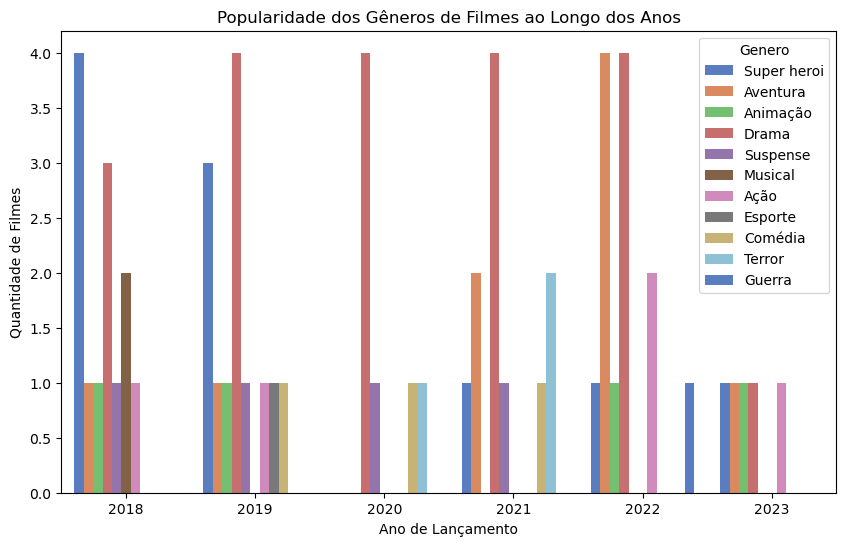

In [85]:
#Este gráfico mostra a popularidade dos gêneros de filmes ao longo dos anos.

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ano_Lancamento', hue='Genero', palette='muted')
plt.title("Popularidade dos Gêneros de Filmes ao Longo dos Anos")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Quantidade de Filmes")
plt.legend(title="Genero")
plt.show()

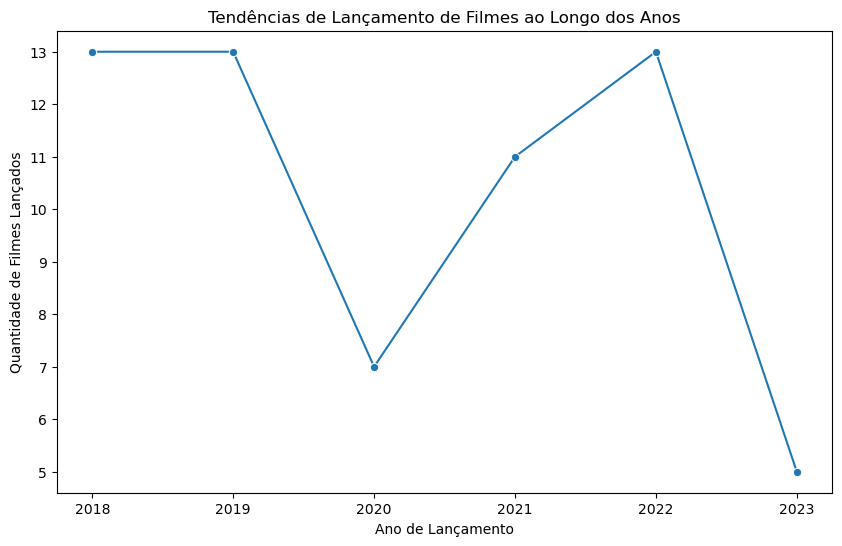

In [86]:
#Aqui visualizamos a quantidade de filmes lançados ao longo dos anos.

anos = df.groupby('Ano_Lancamento').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=anos.index, y=anos.values, marker='o')
plt.title("Tendências de Lançamento de Filmes ao Longo dos Anos")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Quantidade de Filmes Lançados")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


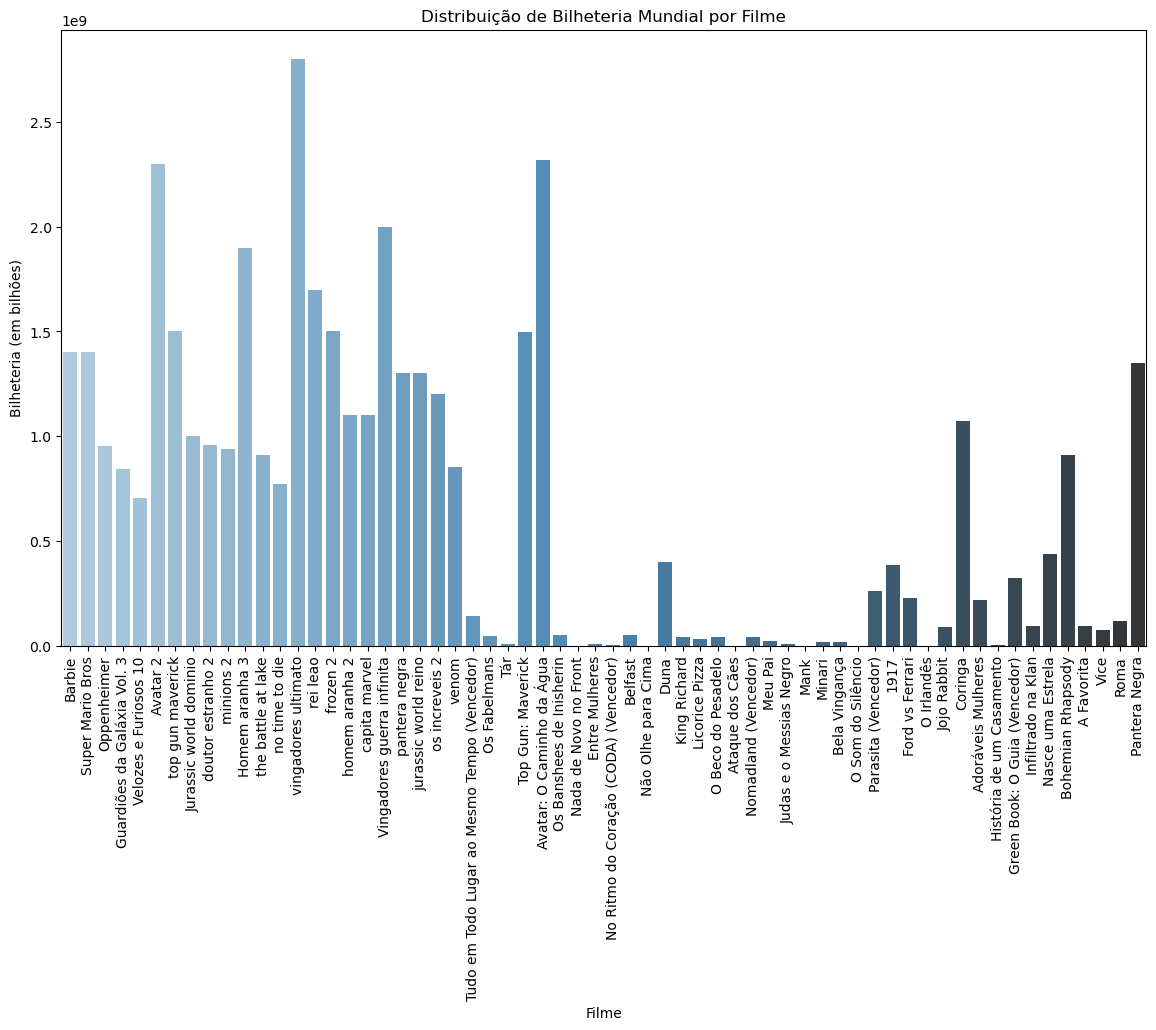

In [87]:
#Este gráfico compara a bilheteria mundial dos filmes.

def convert_bilheteria(value):
    value = value.replace("R$", "").replace("$", "").replace(",", ".").strip()
    if 'B' in value:
        return float(value.replace("B", "")) * 1_000_000_000
    elif 'M' in value:
        return float(value.replace("M", "")) * 1_000_000
    else:
        return float(value)


df['Bilheteria'] = df['Bilheteria'].apply(convert_bilheteria)

# Criação do gráfico
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Filme', y='Bilheteria', hue='Filme', palette='Blues_d', dodge=False)
plt.title("Distribuição de Bilheteria Mundial por Filme")
plt.xlabel("Filme")
plt.ylabel("Bilheteria (em bilhões)")
plt.xticks(rotation=90)
plt.legend().remove()  # Remove a legenda
plt.show()

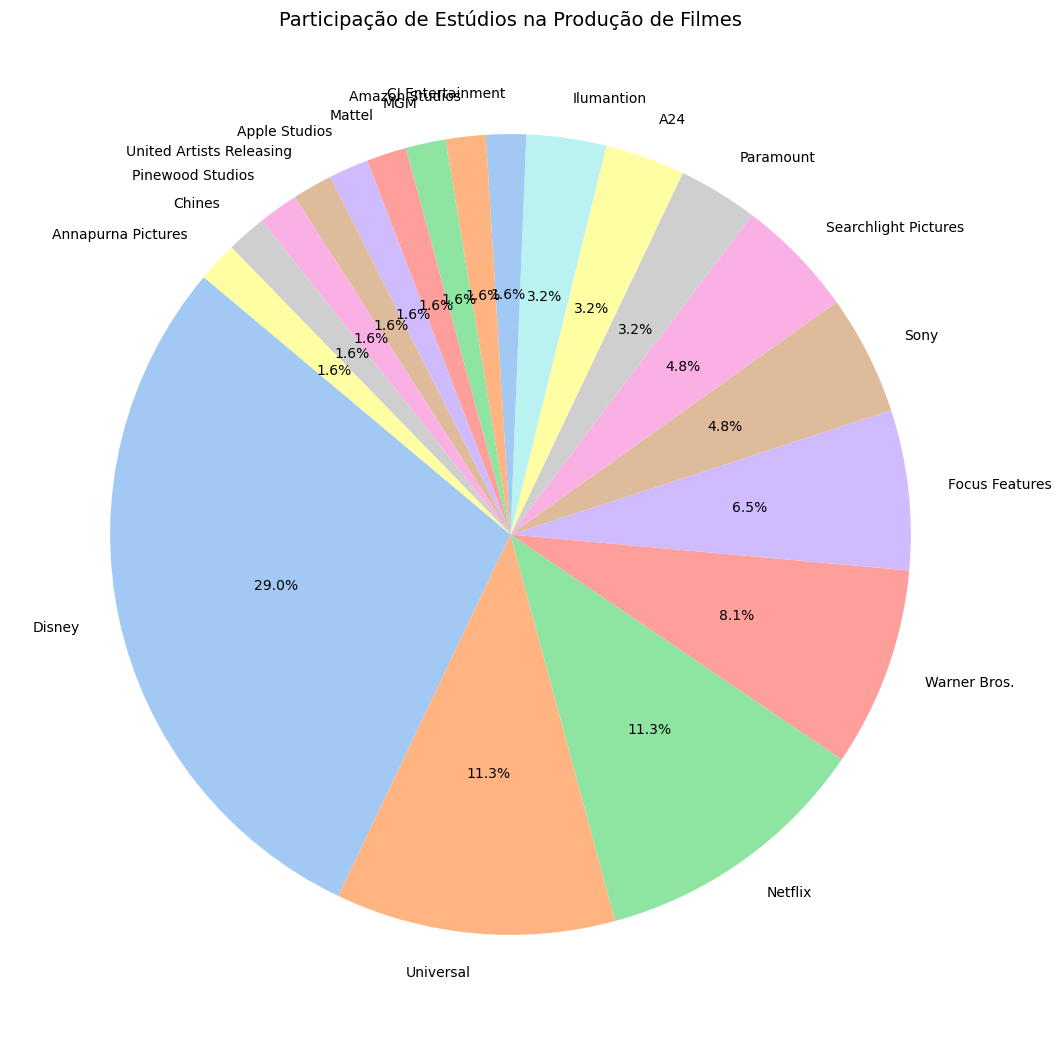

In [88]:
#Este gráfico mostra a participação percentual dos estúdios.

plt.figure(figsize=(13, 13))
df['Estúdio'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("pastel"),
    textprops={'fontsize': 10}  # Ajusta o tamanho da fonte dos percentuais
)
plt.title("Participação de Estúdios na Produção de Filmes", fontsize=14)  # Ajusta o tamanho do título
plt.ylabel('')
plt.show()

C:\Users\joaos\AppData\Local\Temp\ipykernel_15456\2021615405.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Genero', y='Bilheteria', palette='Set3')


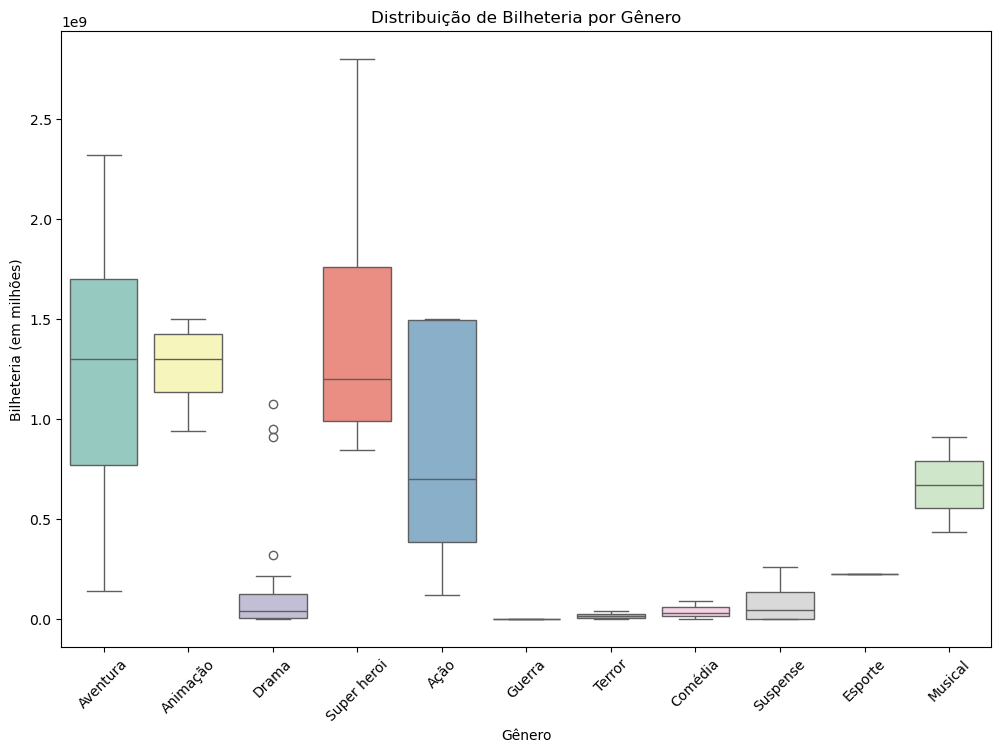

In [89]:
plt.figure(figsize=(12, 8))

# Gráfico de boxplot para bilheteria por gênero
sns.boxplot(data=df, x='Genero', y='Bilheteria', palette='Set3')

# Configurações de rótulo e título
plt.title("Distribuição de Bilheteria por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Bilheteria (em milhões)")
plt.xticks(rotation=45)
plt.show()

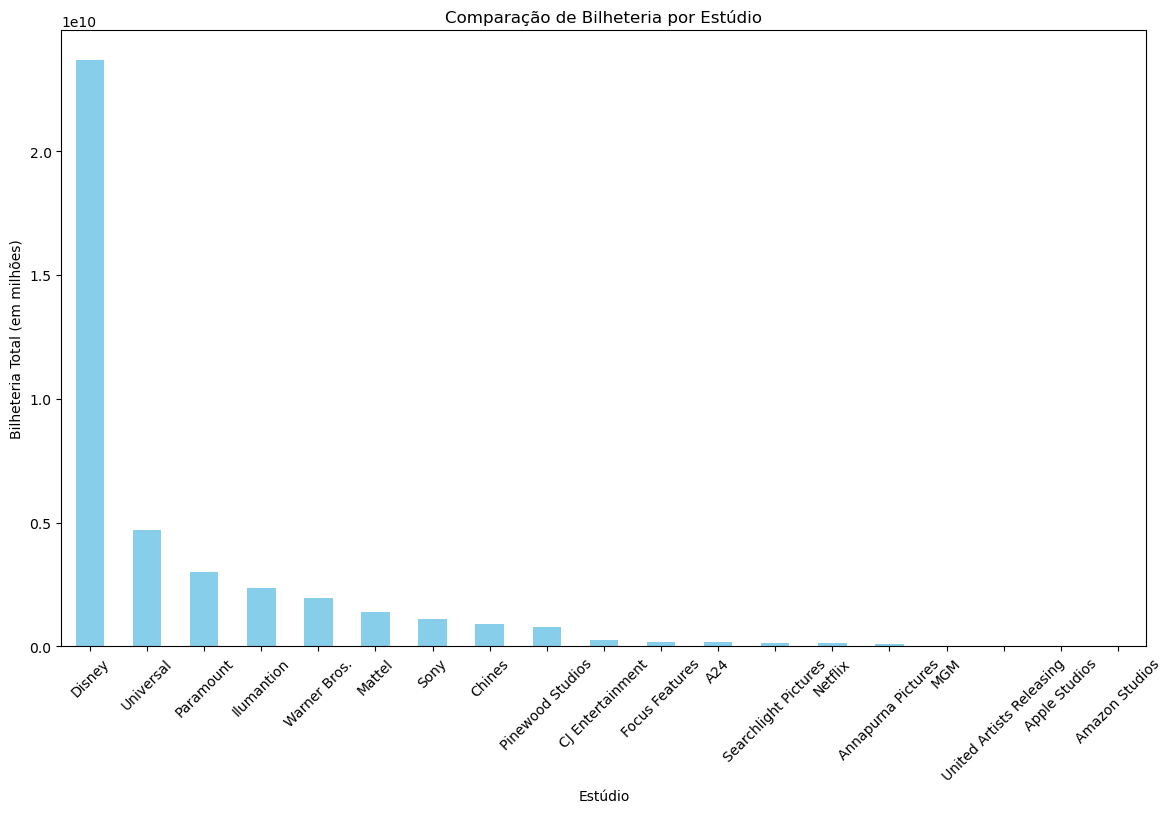

In [91]:
df['Bilheteria'] = pd.to_numeric(df['Bilheteria'], errors='coerce')

# Removendo linhas com valores NaN em 'Bilheteria' após a conversão
df = df.dropna(subset=['Bilheteria'])

# Agrupando os dados por estúdio e somando a bilheteria
studio_revenue = df.groupby('Estúdio')['Bilheteria'].sum().sort_values(ascending=False)

# Criando o gráfico de barras para comparação de bilheteria por estúdio
plt.figure(figsize=(14, 8))
studio_revenue.plot(kind='bar', color='skyblue')

# Configurações de rótulo e título
plt.title("Comparação de Bilheteria por Estúdio")
plt.xlabel("Estúdio")
plt.ylabel("Bilheteria Total (em milhões)")
plt.xticks(rotation=45)
plt.show()